# 1. Packages

In [2]:
from pymongo import MongoClient
from bson.json_util import dumps
from bson.json_util import loads

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 Prepare machine learning

## 2.1 Import training data

In [3]:
training_data = '100_2022-02-12_13-25-48.csv'
fs = int(training_data.split('_')[0])
xyz_org = pd.read_csv(training_data, index_col=0)
xyz_org

,a_x,a_y,a_z,x_time
_id,,,,
6207eda2acd52e639c4673a7,0.05493,0.00122,0.86914,0.009
6207eda2acd52e639c4673a8,0.06494,0.00391,0.85791,0.031
6207eda2acd52e639c4673a9,0.05688,0.00464,0.85986,0.044
6207eda2acd52e639c4673aa,0.05298,-0.00146,0.87329,0.055
6207eda2acd52e639c4673ab,0.05640,0.00708,0.86816,0.073
...,...,...,...,...
6207eda3acd52e639c4b2661,0.05908,-0.00269,0.86987,4305.731
6207eda3acd52e639c4b2662,0.06055,-0.00195,0.87646,4305.750
6207eda3acd52e639c4b2663,0.06323,0.00659,0.87549,4305.766


In [4]:
def calcFFT(accel, nrsamples):
    accel_without_mean = accel - np.mean(accel,axis=0)  # Subtract mean Value to reduce the DC Offset in the FFT
    freq = np.fft.rfft(accel_without_mean, nrsamples, norm='ortho')
    freq = np.abs(freq)
    freq = freq / nrsamples  # Normalize the Amplitude by the known sample number
    return freq

In [5]:
#%matplotlib widget

sample_length = len(xyz_org)

a_x = xyz_org.iloc[:,0]
a_y = xyz_org.iloc[:,1]
a_z = xyz_org.iloc[:,2]
x_time = xyz_org.iloc[:,3]

ax_freq = calcFFT(np.array(a_x), sample_length)
ay_freq = calcFFT(np.array(a_y), sample_length)
az_freq = calcFFT(np.array(a_z), sample_length)
a_abs = np.sqrt(a_x*a_x+a_y*a_y+a_z*a_z)

a_freq = calcFFT(a_abs, sample_length)
x_freq = np.linspace(0.0, (fs / 2), int(sample_length / 2) + 1)

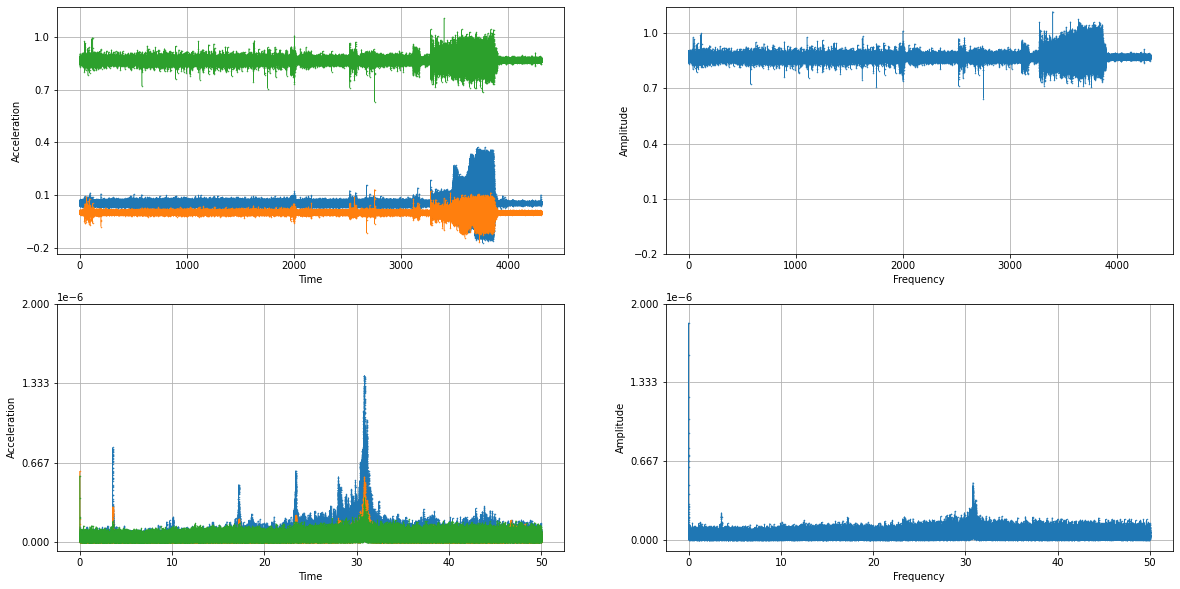

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

ax1 = axs[0,0]
ax1.plot(x_time, a_x, '.-', label="a_x", linewidth=0.5, ms=1)
ax1.plot(x_time, a_y, '.-', label="a_y", linewidth=0.5, ms=1)
ax1.plot(x_time, a_z, '.-', label="a_z", linewidth=0.5, ms=1)
ax1.set(xlabel="Time")
ax1.set(ylabel="Acceleration")
ax1.grid(True)

ax2 = axs[0,1]
ax2.plot(x_time, a_abs, '.-', label="a_freq", linewidth=0.5, ms=1)
ax2.set(xlabel="Frequency")
ax2.set(ylabel="Amplitude")
ax2.grid(True)

ax3 = axs[1,0]
ax3.plot(x_freq, ax_freq, '.-', label="a_x_freq", linewidth=0.5, ms=1)
ax3.plot(x_freq, ay_freq, '.-', label="a_y_freq", linewidth=0.5, ms=1)
ax3.plot(x_freq, az_freq, '.-', label="a_z_freq", linewidth=0.5, ms=1)
ax3.set(xlabel="Time")
ax3.set(ylabel="Acceleration")
ax3.grid(True)

ax4 = axs[1,1]
ax4.plot(x_freq, a_freq, '.-', label="a_freq", linewidth=0.5, ms=1)
ax4.set(xlabel="Frequency")
ax4.set(ylabel="Amplitude")
ax4.grid(True)

ax1.set_yticks(np.linspace(-0.2,1,5))
ax2.set_yticks(np.linspace(-0.2,1,5))
ax3.set_yticks(np.linspace(0,2*1e-6,4))
ax4.set_yticks(np.linspace(0,2*1e-6,4))

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## 2.2 Add categories and absolute acceleration

In [7]:
xyz = xyz_org

In [8]:
def cat(t):
    categorie=[]
    for i in range(0, len(xyz)):
        time = xyz.iloc[i,3]
        
        for n in t:
            if n[0] < time <= n[1]:
                categorie.append(n[2])
            
    return categorie

In [9]:
classes = [ '0 Standstill', '1 Pump in water', '2 Washing/Flushing', '3 Pump out water', '4 Spinning']

t =[[0.00,41.32,0],[41.32,110.36,1],[110.36,115.19,0],[115.19,120.46,1],[120.46,125.06,0],[125.06,196.85,1],[196.85,1967.13,2],[1967.13,1988.08,3],[1988.08,1991.04,0],[1991.04,2007.11,3],[2007.11,2056.95,0],[2056.95,2160.12,1],[2160.12,2519.8,2],[2519.8,2521.00,3],[2521.00,2559.75,2],[2559.75,2562.72,0],[2562.72,2573.83,2],[2573.83,2574.52,3],[2574.52,2578.69,2],[2578.69,2752.54,1],[2752.54,3112.2,2],[3112.2,3151.51,3],[3151.51,3154.02,0],[3154.02,3170.29,3],[3170.29,3275.55,0],[3275.55,3287.62,3],[3287.62,3299.65,0],[3299.65,3330.47,3],[3330.47,3341.53,0],[3341.53,3343.37,3],[3343.37,3876.16,4],[3876.16,3879.01,0],[3879.01,3890.54,3],[3890.54,4305.79,0]]


In [10]:
xyz['cat'] = cat(t)
xyz['a_abs'] = a_abs

In [11]:
xyz

,a_x,a_y,a_z,x_time,cat,a_abs
_id,,,,,,
6207eda2acd52e639c4673a7,0.05493,0.00122,0.86914,0.009,0,0.870875
6207eda2acd52e639c4673a8,0.06494,0.00391,0.85791,0.031,0,0.860373
6207eda2acd52e639c4673a9,0.05688,0.00464,0.85986,0.044,0,0.861752
6207eda2acd52e639c4673aa,0.05298,-0.00146,0.87329,0.055,0,0.874897
6207eda2acd52e639c4673ab,0.05640,0.00708,0.86816,0.073,0,0.870019
...,...,...,...,...,...,...
6207eda3acd52e639c4b2661,0.05908,-0.00269,0.86987,4305.731,0,0.871878
6207eda3acd52e639c4b2662,0.06055,-0.00195,0.87646,4305.750,0,0.878551
6207eda3acd52e639c4b2663,0.06323,0.00659,0.87549,4305.766,0,0.877795


In [12]:
xyz_stacked = pd.DataFrame()

for i in range(0,10):
    xyz_stacked = pd.concat([xyz_stacked,xyz])

xyz_stacked

,a_x,a_y,a_z,x_time,cat,a_abs
_id,,,,,,
6207eda2acd52e639c4673a7,0.05493,0.00122,0.86914,0.009,0,0.870875
6207eda2acd52e639c4673a8,0.06494,0.00391,0.85791,0.031,0,0.860373
6207eda2acd52e639c4673a9,0.05688,0.00464,0.85986,0.044,0,0.861752
6207eda2acd52e639c4673aa,0.05298,-0.00146,0.87329,0.055,0,0.874897
6207eda2acd52e639c4673ab,0.05640,0.00708,0.86816,0.073,0,0.870019
...,...,...,...,...,...,...
6207eda3acd52e639c4b2661,0.05908,-0.00269,0.86987,4305.731,0,0.871878
6207eda3acd52e639c4b2662,0.06055,-0.00195,0.87646,4305.750,0,0.878551
6207eda3acd52e639c4b2663,0.06323,0.00659,0.87549,4305.766,0,0.877795


# 3. Create dataframe of frequency for classifier

## 3.1 Limiting categorie size

In [13]:
columns = 50 # means a testing set of 100 samples
start =  0
red = 0

In [14]:
length_min = []
for i in range(0,len(classes)):
    a_abs_cat = xyz_stacked[xyz_stacked['cat']==i]
    length_min.append(len(a_abs_cat))
rows = int(min(length_min)/columns)*columns
rows = int((rows/2)/columns)*columns*2
for i in range(0,len(classes)):
    print('Categorie ', i, ': ', length_min[i], ' samples')
    
print('\nSize limit of categories:',rows)
#rows = 100

Categorie  0 :  469300  samples
Categorie  1 :  302420  samples
Categorie  2 :  1818420  samples
Categorie  3 :  107780  samples
Categorie  4 :  381110  samples

Size limit of categories: 107700


## 3.2 Calculate frequencies for each categorie in sets

In [15]:
df_a_abs_cat = pd.DataFrame()
df_freq_each_cat = pd.DataFrame()

for i in range(0,len(classes)):
    
    a_abs_each_cat = xyz_stacked[xyz_stacked['cat']==i].iloc[start:start+rows,5].reset_index(drop=True)
    
    df_a_abs_cat[str(i)]= a_abs_each_cat

    df_freq_each_cat_sep_collection = pd.DataFrame()
    
    for x in range(0,len(df_a_abs_cat),columns*2):
        
        df_a_abs_cat_sep = df_a_abs_cat.iloc[x:x+columns*2,i]

        freq_cat_sep_arr = calcFFT(df_a_abs_cat_sep, len(df_a_abs_cat_sep))
        
        df_calcFFT = pd.DataFrame(freq_cat_sep_arr)
        df_calcFFT = df_calcFFT.drop(0)

        df_freq_each_cat_sep_collection = pd.concat([df_freq_each_cat_sep_collection, df_calcFFT])

    df_freq_each_cat_sep_collection = df_freq_each_cat_sep_collection.reset_index(drop=True)
        
    df_freq_each_cat[str(i)]= df_freq_each_cat_sep_collection

df_freq_each_cat
#df_a_abs_cat

,0,1,2,3,4
0,0.000152,0.000143,0.000013,0.000301,0.000267
1,0.000016,0.000187,0.000040,0.000259,0.000134
2,0.000063,0.000105,0.000075,0.000168,0.000278
3,0.000054,0.000126,0.000093,0.000152,0.000103
4,0.000031,0.000230,0.000026,0.000110,0.000135
...,...,...,...,...,...
53845,0.000084,0.000076,0.000133,0.000311,0.000380
53846,0.000062,0.000065,0.000018,0.000190,0.000393
53847,0.000060,0.000054,0.000100,0.000082,0.000670
53848,0.000067,0.000057,0.000067,0.000356,0.000268


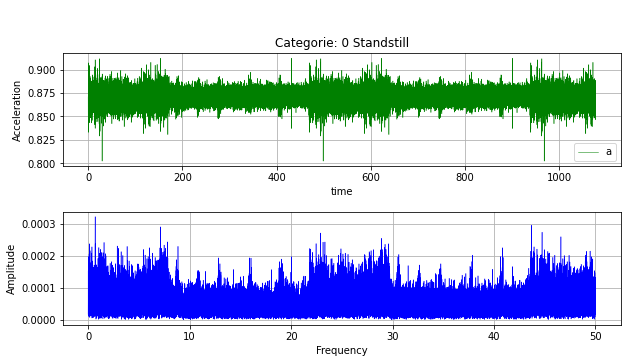

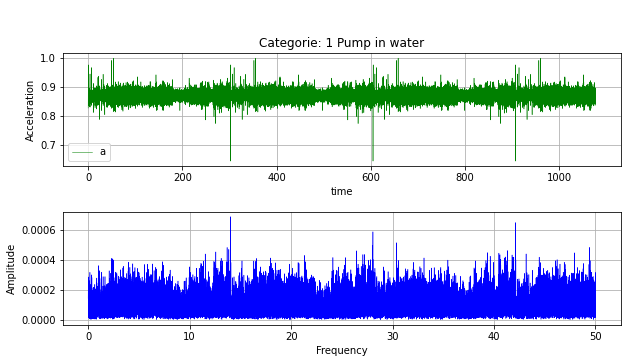

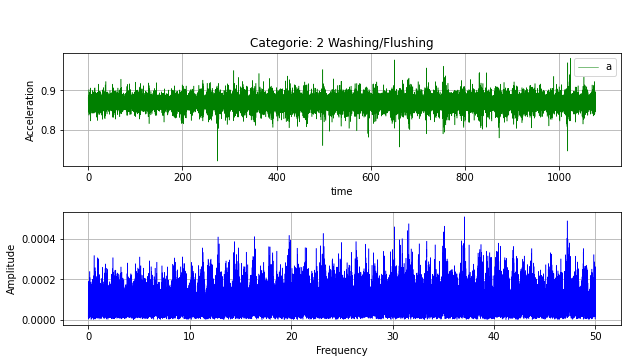

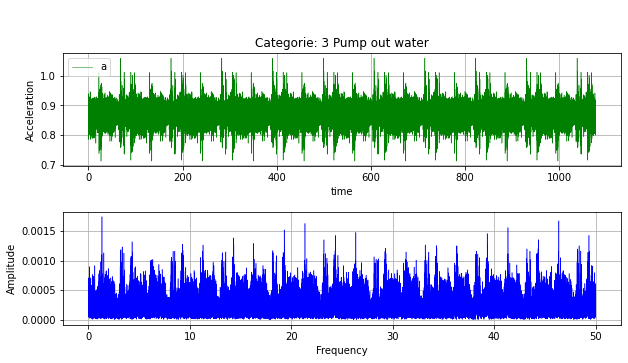

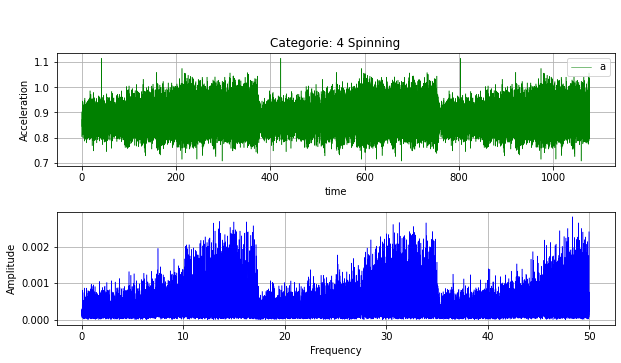

In [16]:
for n in df_freq_each_cat:
    a_abs = df_a_abs_cat[n].values
    a_abs_freq= df_freq_each_cat[n].values

    x_freq_set= np.linspace(0.0, (fs / 2), int(len(a_abs) / 2))

    x_time_set= np.linspace(0.0, (1 / fs) * len(a_abs), len(a_abs)).round(3)

    fttfig, axs = plt.subplots(2,1, figsize=(10, 5))

    ax1 = axs[0]
    ax1.set_title('\n\nCategorie: ' + classes[int(n)])
    ax1.plot(x_time_set, a_abs,'g', label="a", linewidth=0.5, ms=1)    
    ax1.set(ylabel="Acceleration")
    ax1.set(xlabel="time")   
    ax1.legend()
    ax1.grid(True)   

    ax2 = axs[1]
    ax2.plot(x_freq_set, a_abs_freq, 'b', label="a_freq", linewidth=0.5, ms=1)
    ax2.set(ylabel="Amplitude")
    ax2.set(xlabel="Frequency")
    ax2.grid(True)

    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.show()

## 3.3 Transform dateframe for classifier

In [17]:
def split_given_size(a, size):
    return np.split(a, np.arange(size,len(a),size))

In [18]:
list_of_splitted_freqs = split_given_size(df_freq_each_cat, columns)

In [19]:
df_freqs = pd.DataFrame()

for i in range(0,len(list_of_splitted_freqs)):
    
    df = list_of_splitted_freqs[i].reset_index(drop=True)
    
    df_freqs = pd.concat([df_freqs,df.transpose()])        

df_freqs.reset_index(inplace=True)
df_freqs.rename(columns={'index':'cat'}, inplace=True)
df_freqs = df_freqs.sort_values(by=['cat'])
df_freqs = df_freqs.reset_index(drop=True)
df_freqs

,cat,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,0.000152,0.000016,0.000063,0.000054,0.000031,0.000046,0.000055,0.000143,0.000061,...,0.000193,0.000191,0.000055,0.000080,0.000030,0.000042,0.000070,0.000082,0.000047,0.000029
1,0,0.000065,0.000060,0.000052,0.000081,0.000022,0.000070,0.000050,0.000076,0.000022,...,0.000072,0.000039,0.000027,0.000059,0.000033,0.000020,0.000004,0.000085,0.000051,0.000017
2,0,0.000010,0.000072,0.000024,0.000077,0.000051,0.000028,0.000062,0.000015,0.000010,...,0.000039,0.000087,0.000056,0.000047,0.000047,0.000066,0.000098,0.000039,0.000027,0.000025
3,0,0.000054,0.000051,0.000044,0.000043,0.000021,0.000083,0.000003,0.000047,0.000077,...,0.000096,0.000043,0.000048,0.000024,0.000051,0.000012,0.000031,0.000028,0.000039,0.000001
4,0,0.000040,0.000125,0.000081,0.000032,0.000056,0.000047,0.000046,0.000035,0.000062,...,0.000084,0.000030,0.000047,0.000052,0.000025,0.000069,0.000016,0.000139,0.000026,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,4,0.000327,0.000196,0.000558,0.000329,0.000414,0.000334,0.000092,0.000479,0.000284,...,0.000367,0.000460,0.000503,0.000436,0.000059,0.000383,0.000175,0.000488,0.000375,0.000384
5381,4,0.000524,0.000375,0.000551,0.000363,0.000177,0.000071,0.000138,0.000359,0.000396,...,0.000463,0.000312,0.000355,0.000230,0.000316,0.000520,0.000210,0.000053,0.000162,0.000069
5382,4,0.000226,0.000309,0.000202,0.000663,0.000175,0.000507,0.000125,0.000267,0.000014,...,0.000805,0.000556,0.000363,0.000451,0.000137,0.000759,0.000072,0.000412,0.000270,0.000057
5383,4,0.000076,0.000069,0.000399,0.000107,0.000260,0.000147,0.000320,0.000082,0.000478,...,0.000449,0.000368,0.000314,0.000363,0.000301,0.000431,0.000273,0.000359,0.000260,0.000676


In [103]:
df_freqs.to_csv('CL_' + training_data, index=False)

# 4. Train classifier with Trainingsdata

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics

In [21]:
split_factor = 0.25

X = df_freqs.iloc[:, 1:].values
y = df_freqs.iloc[:, 0].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_factor, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, max_iter=3000, verbose=False, early_stopping=False)
mlp.fit(X_train_std,y_train)

MLPClassifier(alpha=0.001, max_iter=3000)

In [24]:
predicted = mlp.predict(X_test_std)
probabilities = mlp.predict_proba(X_test_std)

Classification report for classifier MLPClassifier(alpha=0.001, max_iter=3000):
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       270
           1       0.63      0.71      0.67       269
           2       0.59      0.54      0.57       269
           3       0.86      0.93      0.89       270
           4       0.94      0.86      0.90       269

    accuracy                           0.77      1347
   macro avg       0.77      0.77      0.77      1347
weighted avg       0.77      0.77      0.77      1347




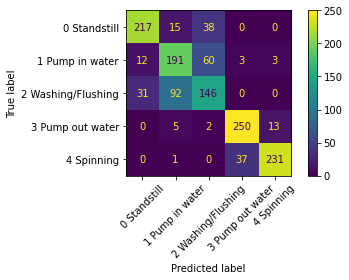

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Classification report for classifier %s:\n%s\n"% (mlp, metrics.classification_report(y_test, predicted)))

cm = confusion_matrix(y_test, predicted, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()

ax = plt.gca()

ax.set_xticklabels(labels=classes,rotation=45);
plt.tight_layout()
plt.show()

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.2, random_state=1)

In [27]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

# 4. Testing classifier with batched trainingsdata

In [29]:
xyz

,a_x,a_y,a_z,x_time,cat,a_abs
_id,,,,,,
6207eda2acd52e639c4673a7,0.05493,0.00122,0.86914,0.009,0,0.870875
6207eda2acd52e639c4673a8,0.06494,0.00391,0.85791,0.031,0,0.860373
6207eda2acd52e639c4673a9,0.05688,0.00464,0.85986,0.044,0,0.861752
6207eda2acd52e639c4673aa,0.05298,-0.00146,0.87329,0.055,0,0.874897
6207eda2acd52e639c4673ab,0.05640,0.00708,0.86816,0.073,0,0.870019
...,...,...,...,...,...,...
6207eda3acd52e639c4b2661,0.05908,-0.00269,0.86987,4305.731,0,0.871878
6207eda3acd52e639c4b2662,0.06055,-0.00195,0.87646,4305.750,0,0.878551
6207eda3acd52e639c4b2663,0.06323,0.00659,0.87549,4305.766,0,0.877795


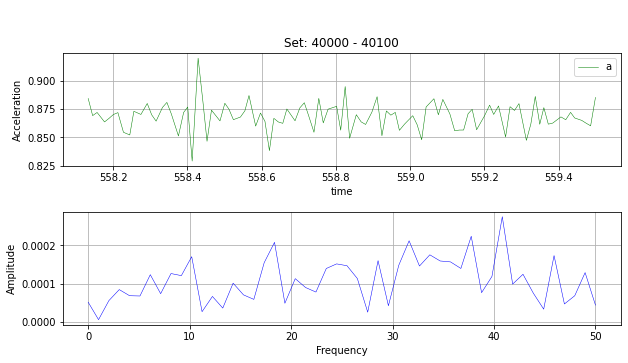

Categorie:[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
MLP:['2']   SVM:['2']   PPN:['0']   LR:['0']


In [30]:
start_test = 40000
set_length = columns*2

for i in range(start_test, start_test+set_length, set_length):
    
    a_abs_test = xyz.iloc[i:i+set_length,5]
    x_time_test = xyz.iloc[i:i+set_length,3]
    
    a_freq_test = np.delete(calcFFT(a_abs_test, len(a_abs_test)),0)
    x_freq_test = np.linspace(0.0, (fs / 2), int(set_length / 2))
    
    fttfig, axs = plt.subplots(2,1, figsize=(10, 5))

    ax1 = axs[0]
    ax1.plot(x_time_test, a_abs_test,'g', label="a", linewidth=0.5, ms=1)    
    ax1.set_title('\n\nSet: ' + str(start_test) + ' - ' + str(start_test+set_length))
    ax1.set(ylabel="Acceleration")
    ax1.set(xlabel="time")
    ax1.legend()
    ax1.grid(True)  
    
    ax2 = axs[1]
    ax2.plot(x_freq_test, a_freq_test, 'b', label="a_freq", linewidth=0.5, ms=1)
    ax2.set(ylabel="Amplitude")
    ax2.set(xlabel="Frequency")
    ax2.grid(True)
    
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
        
    plt.show()
    
    a_freq_test = a_freq_test.reshape(1,-1)
    a_freq_test_std = sc.transform(a_freq_test)
    
    y_pred_mlp = mlp.predict(a_freq_test_std)
    y_pred_svm = svm.predict(a_freq_test_std)
    y_pred_ppn = ppn.predict(a_freq_test_std)
    y_pred_lr = lr.predict(a_freq_test_std)
    
    real_cat = list(xyz.iloc[i:i+set_length,4])
    print('Categorie:',real_cat,'\nMLP:',y_pred_mlp,'   SVM:',y_pred_svm, '   PPN:',y_pred_ppn, '   LR:',y_pred_lr, sep='')    